38069   -0.134888
38070   -0.138672
38071   -0.138062
38072   -0.142212
38073   -0.140991
           ...   
38244   -0.123779
38245   -0.130371
38246   -0.117920
38247   -0.125732
38248   -0.125854
Name: x-axis, Length: 180, dtype: float64
38069   -0.877075
38070   -0.877686
38071   -0.877563
38072   -0.876099
38073   -0.878418
           ...   
38244   -0.884644
38245   -0.884277
38246   -0.885010
38247   -0.885254
38248   -0.883545
Name: y-axis, Length: 180, dtype: float64
38069    0.493774
38070    0.495239
38071    0.494385
38072    0.496582
38073    0.496094
           ...   
38244    0.485962
38245    0.488525
38246    0.484131
38247    0.488159
38248    0.484863
Name: z-axis, Length: 180, dtype: float64
38069    1.310976
38070    1.006098
38071    1.097561
38072    1.310976
38073    1.310976
           ...   
38244    1.463415
38245    1.097561
38246    1.219512
38247    1.432927
38248    1.341463
Name: x-rotate, Length: 180, dtype: float64
38069    2.195122
38070    1.859756
38

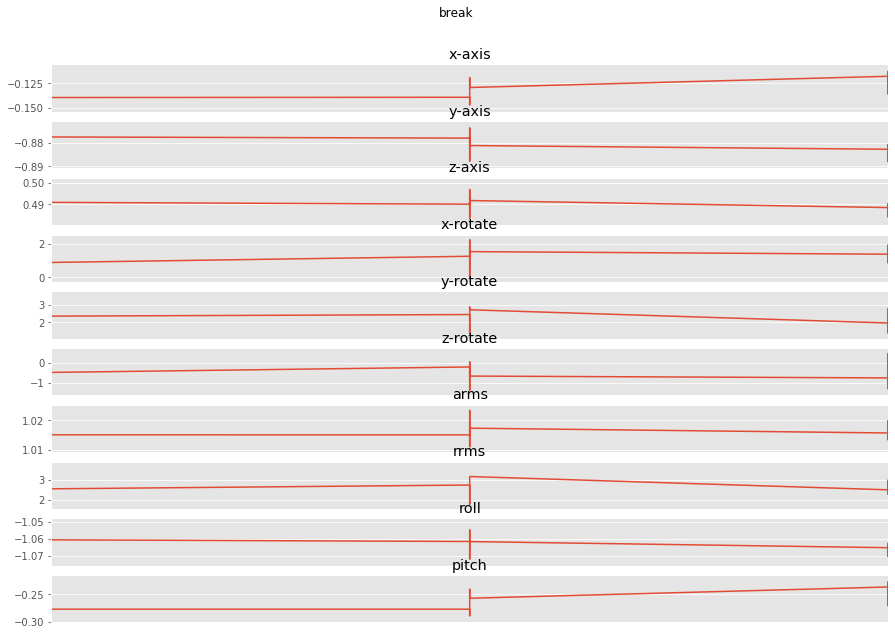

0     -0.081177
1     -0.180542
2     -0.199829
3     -0.203613
4     -0.251953
         ...   
175   -0.329590
176   -0.339111
177   -0.364990
178   -0.304199
179   -0.349487
Name: x-axis, Length: 180, dtype: float64
0      0.942993
1      0.758057
2      0.737305
3      0.774536
4      0.892700
         ...   
175    1.038086
176    1.026611
177    1.035889
178    1.036377
179    1.042725
Name: y-axis, Length: 180, dtype: float64
0     -0.363281
1     -0.266846
2     -0.229248
3     -0.268433
4     -0.321533
         ...   
175   -0.309448
176   -0.286255
177   -0.341675
178   -0.286743
179   -0.282104
Name: z-axis, Length: 180, dtype: float64
0      1.006098
1     -4.451220
2     -3.780488
3     -7.865854
4      2.103659
         ...   
175   -1.250000
176    7.560976
177    1.676829
178   -5.518293
179   -4.024390
Name: x-rotate, Length: 180, dtype: float64
0      -2.530488
1      -8.262195
2     -17.530488
3      -6.646341
4      -5.487805
         ...    
175     1.219512
176    

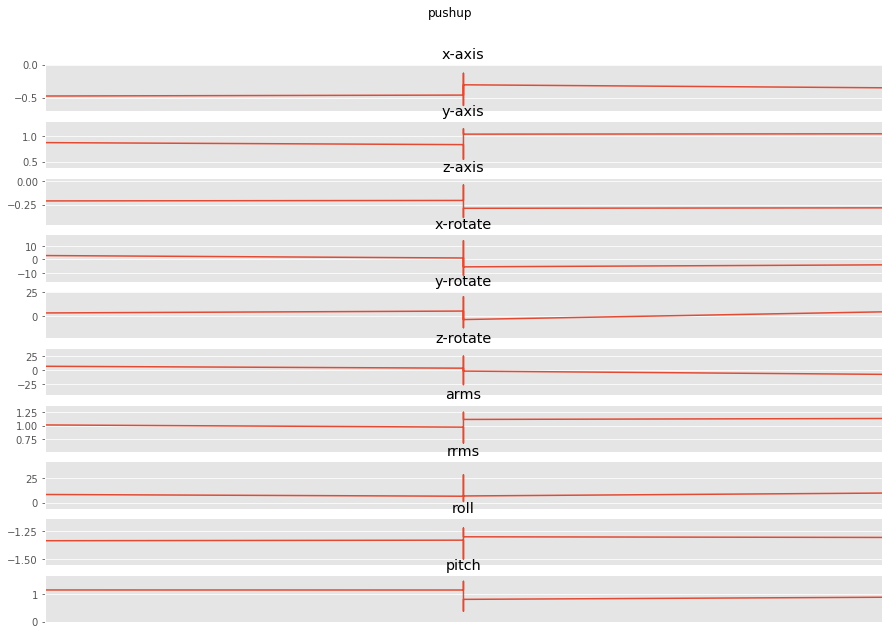

2618   -0.919678
2619   -0.894165
2620   -0.860474
2621   -0.826172
2622   -0.901611
          ...   
2793   -0.939331
2794   -0.934448
2795   -0.930542
2796   -0.930298
2797   -0.939209
Name: x-axis, Length: 180, dtype: float64
2618    0.347656
2619    0.359619
2620    0.344727
2621    0.283936
2622    0.202026
          ...   
2793    0.242065
2794    0.218628
2795    0.216431
2796    0.211426
2797    0.191528
Name: y-axis, Length: 180, dtype: float64
2618    0.120239
2619    0.169922
2620    0.161011
2621    0.007812
2622   -0.211548
          ...   
2793    0.209717
2794    0.234497
2795    0.241455
2796    0.244141
2797    0.184814
Name: z-axis, Length: 180, dtype: float64
2618     1.737805
2619     5.945122
2620     9.695122
2621    13.689024
2622     3.750000
          ...    
2793     2.987805
2794    -0.304878
2795     0.701220
2796    -2.012195
2797    -1.371951
Name: x-rotate, Length: 180, dtype: float64
2618     3.140244
2619    12.500000
2620    38.506098
2621    69.725610

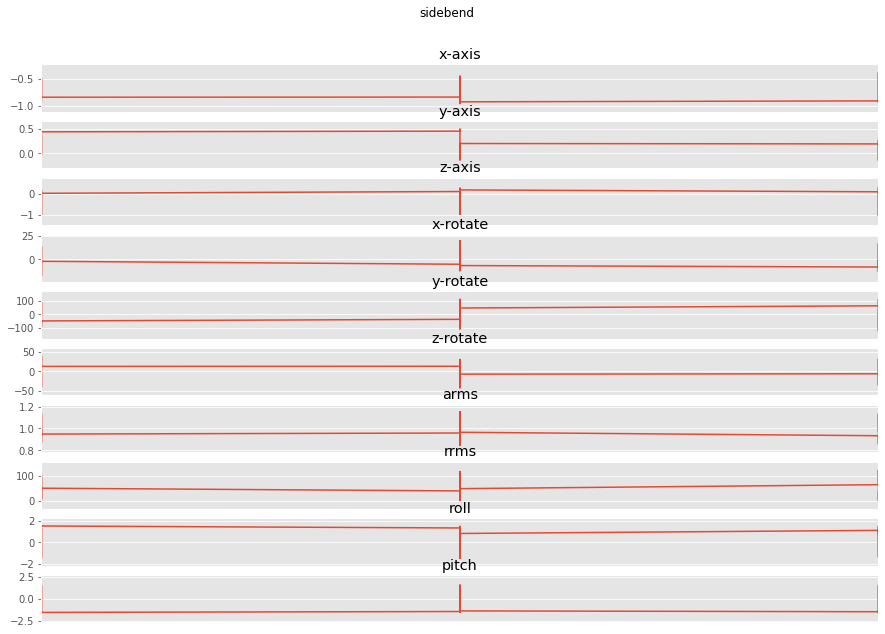

13684   -0.605713
13685   -0.628418
13686   -0.566406
13687   -0.510986
13688   -0.499512
           ...   
13859   -0.299072
13860   -0.172119
13861   -0.049194
13862    0.052246
13863    0.084595
Name: x-axis, Length: 180, dtype: float64
13684    0.637817
13685    0.649292
13686    0.730469
13687    0.734131
13688    0.727905
           ...   
13859   -0.109009
13860   -0.267456
13861   -0.310303
13862   -0.369141
13863   -0.361084
Name: y-axis, Length: 180, dtype: float64
13684    0.042358
13685    0.082764
13686    0.085815
13687    0.085815
13688    0.135498
           ...   
13859    1.020630
13860    1.013794
13861    1.026367
13862    1.039551
13863    1.047241
Name: z-axis, Length: 180, dtype: float64
13684     2.682927
13685   -28.201220
13686   -12.439024
13687   -12.957317
13688   -16.128049
           ...    
13859   -67.408537
13860   -65.548780
13861   -41.280488
13862   -11.128049
13863    -3.871951
Name: x-rotate, Length: 180, dtype: float64
13684    52.682927
13685   

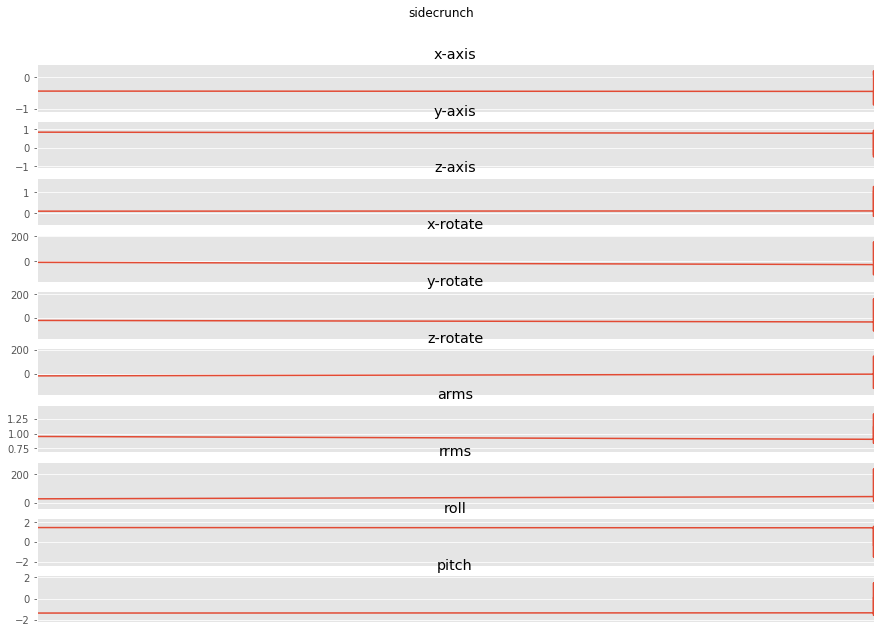

18466   -0.581177
18467   -0.650391
18468   -0.715698
18469   -0.803589
18470   -0.932861
           ...   
18641   -0.755249
18642   -0.784302
18643   -0.814697
18644   -0.822754
18645   -0.836670
Name: x-axis, Length: 180, dtype: float64
18466   -0.932495
18467   -0.921143
18468   -0.850830
18469   -0.756104
18470   -0.640137
           ...   
18641    0.497559
18642    0.553345
18643    0.624878
18644    0.705566
18645    0.736084
Name: y-axis, Length: 180, dtype: float64
18466    0.265747
18467    0.258057
18468    0.262573
18469    0.259644
18470    0.210693
           ...   
18641   -0.103394
18642   -0.099365
18643   -0.101929
18644   -0.116943
18645   -0.132202
Name: z-axis, Length: 180, dtype: float64
18466    3.170732
18467    9.939024
18468    8.841463
18469    0.335366
18470   -2.317073
           ...   
18641    2.225610
18642    0.396341
18643    1.737805
18644    2.804878
18645    3.536585
Name: x-rotate, Length: 180, dtype: float64
18466     1.463415
18467     9.420732


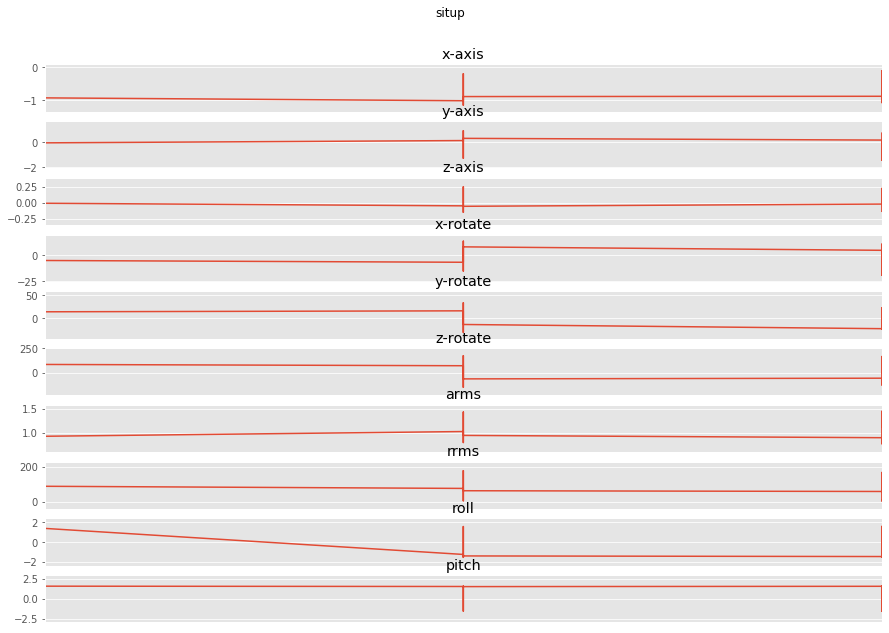

28835   -0.972046
28836   -0.934570
28837   -0.836548
28838   -0.756592
28839   -0.822998
           ...   
29010   -0.978882
29011   -1.016357
29012   -0.981201
29013   -0.986206
29014   -1.010742
Name: x-axis, Length: 180, dtype: float64
28835    0.085449
28836    0.031860
28837    0.060791
28838    0.093262
28839    0.120239
           ...   
29010    0.017700
29011    0.046143
29012    0.066040
29013    0.064453
29014    0.076538
Name: y-axis, Length: 180, dtype: float64
28835    0.160767
28836    0.186157
28837    0.167725
28838    0.146851
28839    0.147095
           ...   
29010    0.221802
29011    0.222534
29012    0.193604
29013    0.186035
29014    0.154663
Name: z-axis, Length: 180, dtype: float64
28835     2.408537
28836    27.621951
28837    48.353659
28838    35.487805
28839    20.975610
           ...    
29010     7.134146
29011     4.969512
29012     3.506098
29013    -0.060976
29014     1.585366
Name: x-rotate, Length: 180, dtype: float64
28835    2.621951
28836    

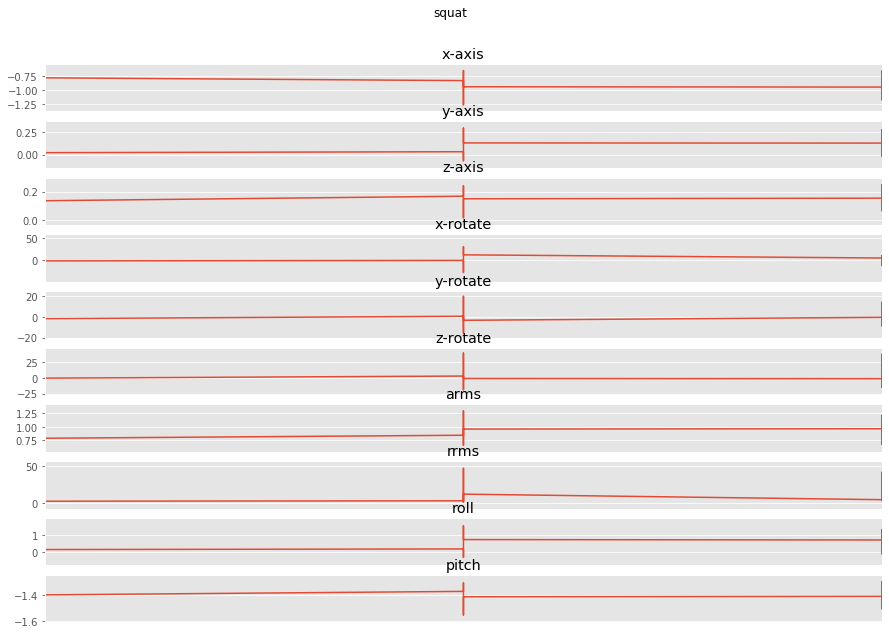

conv2d_4
max_pooling2d_4
dropout_4
flatten_4
dense_12
dense_13
dense_14
Train on 1904 samples, validate on 476 samples
Epoch 1/50
1904/1904 - 4s - loss: 1.0332 - accuracy: 0.8120 - val_loss: 5.0370 - val_accuracy: 0.3109
Epoch 2/50
1904/1904 - 3s - loss: 0.2353 - accuracy: 0.9317 - val_loss: 9.8927 - val_accuracy: 0.3109
Epoch 3/50
1904/1904 - 3s - loss: 0.1672 - accuracy: 0.9496 - val_loss: 13.8925 - val_accuracy: 0.3109
Epoch 4/50
1904/1904 - 3s - loss: 0.0655 - accuracy: 0.9758 - val_loss: 14.8763 - val_accuracy: 0.3109
Epoch 5/50
1904/1904 - 3s - loss: 0.0655 - accuracy: 0.9785 - val_loss: 15.2122 - val_accuracy: 0.3109
Epoch 6/50
1904/1904 - 3s - loss: 0.0556 - accuracy: 0.9821 - val_loss: 15.7061 - val_accuracy: 0.2899
Epoch 7/50
1904/1904 - 3s - loss: 0.1009 - accuracy: 0.9706 - val_loss: 16.0069 - val_accuracy: 0.3109
Epoch 8/50
1904/1904 - 3s - loss: 0.0445 - accuracy: 0.9874 - val_loss: 18.3844 - val_accuracy: 0.3109
Epoch 9/50
1904/1904 - 3s - loss: 0.0420 - accuracy: 0.9884

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 27 14:34:20 2017
This is a small project for CNN in KERAS.
This file creates, trains and save a convolutional neural network for
Human Acitivity Recognition. The data we used for this file is released and provided by
Wireless Sensor Data Mining (WISDM) lab and can be found on this link.
http://www.cis.fordham.edu/wisdm/dataset.php  
Feel free to use this code and site this repositry if you use it for your reports or project.
@author: Muhammad Shahnawaz
"""
# importing libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
#from keras import backend as K
from tensorflow.keras import optimizers
#K.set_image_dim_ordering('th')
# setting up a random seed for reproducibility
random_seed = 611
np.random.seed(random_seed)

# matplotlib inline
plt.style.use('ggplot')
# defining function for loading the dataset
def readData(filePath):
    # attributes of the dataset
    columnNames = ['user_id','activity','timestamp','x-axis','y-axis','z-axis','x-rotate','y-rotate','z-rotate','arms','rrms','roll','pitch']
    data = pd.read_csv(filePath,header = None, names=columnNames,na_values=';')
    return data
# defining a function for feature normalization
# (feature - mean)/stdiv

# defining the function to plot a single axis data
def plotAxis(axis,x,y,title):
    y=y.astype(np.float64)
    axis.plot(x,y)
    axis.set_title(title)
    axis.xaxis.set_visible(False)
    
    
    print(y)
    
    #print(y,min(y),type(min(y)))
    
    axis.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    
    axis.set_xlim([min(x),max(x)])
    axis.grid(True)
    
# defining a function to plot the data for a given activity
def plotActivity(activity,data):
    fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows=10, figsize=(15,10),sharex=True)
    plotAxis(ax0,data['timestamp'],data['x-axis'],'x-axis')
    plotAxis(ax1,data['timestamp'],data['y-axis'],'y-axis')
    plotAxis(ax2,data['timestamp'],data['z-axis'],'z-axis')
    plotAxis(ax3,data['timestamp'],data['x-rotate'],'x-rotate')
    plotAxis(ax4,data['timestamp'],data['y-rotate'],'y-rotate')
    plotAxis(ax5,data['timestamp'],data['z-rotate'],'z-rotate')
    plotAxis(ax6,data['timestamp'],data['arms'],'arms')
    plotAxis(ax7,data['timestamp'],data['rrms'],'rrms')
    plotAxis(ax8,data['timestamp'],data['roll'],'roll')
    plotAxis(ax9,data['timestamp'],data['pitch'],'pitch')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
# defining a window function for segmentation purposes
def windows(data,size):
    start = 0
    while start< data.count():
        yield int(start), int(start + size)
        start+= (size/2)
# segmenting the time series
def segment_signal(data, window_size = 30): # 원래는 90
    segments = np.empty((0,window_size,10))
    labels= np.empty((0))
    for (start, end) in windows(data['timestamp'],window_size):
        x = data['x-axis'][start:end]
        y = data['y-axis'][start:end]
        z = data['z-axis'][start:end]
        a = data['x-rotate'][start:end]
        b = data['y-rotate'][start:end]
        c = data['z-rotate'][start:end]
        d = data['arms'][start:end]
        e = data['rrms'][start:end]
        f = data['roll'][start:end]
        g = data['pitch'][start:end]
        
        if(len(data['timestamp'][start:end])==window_size):
            segments = np.vstack([segments,np.dstack([x,y,z,a,b,c,d,e,f,g])])
            labels = np.append(labels,stats.mode(data['activity'][start:end])[0][0])
    return segments, labels
''' Main Code '''
# # # # # # # # #   reading the data   # # # # # # # # # # 
# Path of file #

#dataset = readData('0721_Add_sidebend_learningdata_sort.txt') 
#dataset = readData('0504_total_data_col_13.txt')

#dataset = readData('x_sidebend_내꺼만 추가 안함.txt')
#dataset = readData('x_sidecrunch_다곤 left1, 민지 데이터 반영 안함.txt')

dataset = readData('end.txt') # 사이드 크런치, 사이드 벤드 모두 반영
# plotting a subset of the data to visualize

for activity in np.unique(dataset['activity']):
    subset = dataset[dataset['activity']==activity][:180]
    plotActivity(activity,subset)

    
# segmenting the signal in overlapping windows of 90 samples with 50% overlap
segments, labels = segment_signal(dataset) 
#categorically defining the classes of the activities
labels = np.asarray(pd.get_dummies(labels),dtype = np.int8)
# defining parameters for the input and network layers
# we are treating each segmeent or chunk as a 2D image (90 X 3)
numOfRows = segments.shape[1]
numOfColumns = segments.shape[2]
numChannels = 1
numFilters = 128 # number of filters in Conv2D layer
# kernal size of the Conv2D layer
kernalSize1 = 2
# max pooling window size
poolingWindowSz = 2
# number of filters in fully connected layers
numNueronsFCL1 = 128
numNueronsFCL2 = 128
# split ratio for test and validation
trainSplitRatio = 0.8
# number of epochs
Epochs = 10
# batchsize
batchSize = 10
# number of total clases
numClasses = labels.shape[1]

# dropout ratio for dropout layer
dropOutRatio = 0.2
# reshaping the data for network input
reshapedSegments = segments.reshape(segments.shape[0], numOfRows, numOfColumns,1)
# splitting in training and testing data
trainSplit = np.random.rand(len(reshapedSegments)) < trainSplitRatio
trainX = reshapedSegments[trainSplit]
testX = reshapedSegments[~trainSplit]
trainX = np.nan_to_num(trainX)
testX = np.nan_to_num(testX)


trainY = labels[trainSplit]
testY = labels[~trainSplit]

def cnnModel():
    model = Sequential()
    # adding the first convolutionial layer with 32 filters and 5 by 5 kernal size, using the rectifier as the activation function
    model.add(Conv2D(numFilters, (kernalSize1,kernalSize1),input_shape=(numOfRows, numOfColumns,1),activation='relu'))
    # adding a maxpooling layer
    model.add(MaxPooling2D(pool_size=(poolingWindowSz,poolingWindowSz),padding='valid'))
    # adding a dropout layer for the regularization and avoiding over fitting
    model.add(Dropout(dropOutRatio))
    # flattening the output in order to apply the fully connected layer
    model.add(Flatten())
    # adding first fully connected layer with 256 outputs
    model.add(Dense(numNueronsFCL1, activation='relu'))
    #adding second fully connected layer 128 outputs
    model.add(Dense(numNueronsFCL2, activation='relu'))
    # adding softmax layer for the classification
    model.add(Dense(numClasses, activation='softmax'))
    # Compiling the model to generate a model
    adam = optimizers.Adam(lr = 0.001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = cnnModel()
for layer in model.layers:
    print(layer.name)
trainX=trainX.astype(np.float64)
model.fit(trainX,trainY, validation_split=1-trainSplitRatio,epochs=50,batch_size=batchSize,verbose=2)
score = model.evaluate(testX,testY,verbose=2)
print('Baseline Error: %.2f%%' %(100-score[1]*100))
model.save('model.h5')

np.save('groundTruth.npy',testY)
np.save('testData.npy',testX)
